In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
fn1 = "tarcisio"
ln1 = "da_silva_bueno"
filename = "_".join(map(lambda s: s.strip().lower(), [
                    "SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

 **1. For the first question, we load a standard dataset from sklearn.datasets named fetch_california_housing. This dataset has only $p = 8$ variables.**

In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = data.data
Y = data.target

X = np.append(arr=np.ones((X.shape[0], 1)), values=X, axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0)

**a) Estimate the coefficients with the expression of the normal equations seen in class. Code two functions to compute the MSE and the R2 coefficient and compare them with the version of sklearn for the train and the test sets.**

The expression for the coefficients for the OLS is:

$$ \hat{\theta} = (X^TX)^{-1}X^TY $$

The expressions for the MSE and for the $R^2$ coefficient are as follows:

$$ MSE(Y, Y_{pred}) = \frac{1}{n} \sum_{i=1}^{n} (Y_i - Y_{pred_i})^2$$

$$ R^2(Y, Y_{pred}) = 1 - \frac{\sum_{i=1}^{n} (Y_i - Y_{pred_i})^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}$$


In [4]:
# Function to compute the MSE

def MSE(Y, Y_pred):
    return np.mean((Y - Y_pred)**2)

# Function to compute the R^2

def R2(Y, Y_pred):
    return 1 - np.sum((Y - Y_pred)**2)/np.sum((Y - np.mean(Y))**2)

In [5]:
# Estimate for the coefficients using the norml equation

theta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train

Y_pred = X_test @ theta_hat

# Estimate for the coefficients using the sklearn library

lr = LinearRegression()

lr.fit(X_train, Y_train)

theta_hat_sklearn = lr.coef_

Y_pred_sklearn = lr.predict(X_test)

# Comparison between the R^2 and MSE for the two estimates

data_for_comparison = {'Estimate Method': ['Normal Equation', 'Sklearn Library'],
                       'MSE': [MSE(Y_test, Y_pred), MSE(Y_test, Y_pred_sklearn)],
                       'R2': [R2(Y_test, Y_pred), R2(Y_test, Y_pred_sklearn)]}

pd.DataFrame.from_dict(data_for_comparison)

,Estimate Method,MSE,R2
0,Normal Equation,0.540413,0.59117
1,Sklearn Library,0.540413,0.59117


As can be seen, both methods resulted in identical Mean Squared Error (MSE) and R-squared (R2) values.

 **b) Finally, give the confidence intervals at level 99% for all the coefficients coding the expression for the CI seen in session 3.**

As seen in session 3, the test statistics for the coefficients is as follows:

$$ 
T_j = \frac{\hat{\theta_j} - {\theta^*_j}}{\hat{\sigma} \sqrt{(X^{T}X)_{j,j}^{-1}}} \sim T_{n-p-1}
$$

Where ($\hat{\sigma}$) is calculated as:

$$ \hat{\sigma} = \frac{1}{n-p-1} ||Y-X\hat{\theta}||^2_2$$

The confidence interval for the quantity $\theta^*_j$ is:
$$
CI = \left[\hat{\theta_j} - t_{1-\alpha/2}\hat{\sigma}\sqrt{(X^{T}X)_{j,j}^{-1}},\hat{\theta_j} + t_{1-\alpha/2}\hat{\sigma}\sqrt{(X^{T}X)_{j,j}^{-1}}\right]
$$

Where:
- $\hat{\theta_j}$ is the estimated value of the j-th coefficient.
- $t_{1-\alpha/2}$ is the quantile function of the t-distribution.

In [6]:

# Confidence interval of the regression coefficients

# Compute the standard error of the regression coefficients

sigma_hat = np.sqrt(np.sum((Y_train - X_train @ theta_hat)**2) /
                    (X_train.shape[0] - np.linalg.matrix_rank(X_train)))

# Quantile of the t-distribution
# For a 99% confidence interval, alpha = 0.01

alpha = 0.01
p = 8

t_quantile = t.ppf(1 - alpha/2, X_train.shape[0] - p - 1)

# Confidence interval

CI = [theta_hat - t_quantile * sigma_hat * np.sqrt(np.diag(np.linalg.inv(X_train.T @ X_train))),
      theta_hat + t_quantile * sigma_hat * np.sqrt(np.diag(np.linalg.inv(X_train.T @ X_train)))]

# Confidence interval for each coefficient
# Confidence interval for each coefficient
CI_table = pd.DataFrame({'Coefficient': np.arange(len(theta_hat)),
                         'Lower Bound': CI[0],
                         'Upper Bound': CI[1]})

CI_table

,Coefficient,Lower Bound,Upper Bound
0,0,-38.566040,-34.653147
1,1,0.426611,0.451571
2,2,0.008277,0.010920
3,3,-0.120727,-0.085895
4,4,0.534397,0.699063
5,5,-0.000022,0.000006
6,6,-0.006742,-0.002234
7,7,-0.438729,-0.395977
8,8,-0.452995,-0.408234


 **2) For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data:**

In [7]:
# Import the dataset from csv file
df = pd.read_csv('data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


 **(a) Separate the data in train and test sets: save one fourth of the data as testing (train_test_split from sklearn.model_selection with the random seed set to 0 and standardize both the training and testing sets using the fit_transform and transform functions in sklearn.preprocessing.StandardScaler.**

In [8]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0)

# Create a StandardScaler object
scaler_X = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train = scaler_X.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler_X.transform(X_test)

# Create a separate StandardScaler object for Y
scaler_Y = StandardScaler()

# Fit the scaler to the training data and transform the training data
Y_train = scaler_Y.fit_transform(Y_train.reshape(-1, 1)).ravel()

# Use the same scaler to transform the test data
Y_test = scaler_Y.transform(Y_test.reshape(-1, 1)).ravel()

X_train_init = X_train
X_test_init = X_test
Y_train_init = Y_train
Y_test_init = Y_test

models_summary = {}

# Calculate the condition number
cond_number = np.linalg.cond(X_train)

# Define a threshold for the condition number
threshold = 1 / np.finfo(X_train.dtype).eps

if cond_number > threshold:
    print('The matrix X_train is ill-conditioned. Condition number:', cond_number)
else:
    print('The matrix X_train is well-conditioned. Condition number:', cond_number)

The matrix X_train is ill-conditioned. Condition number: 2.3362978749932556e+16


 **(b) Fit a regular OLS.**

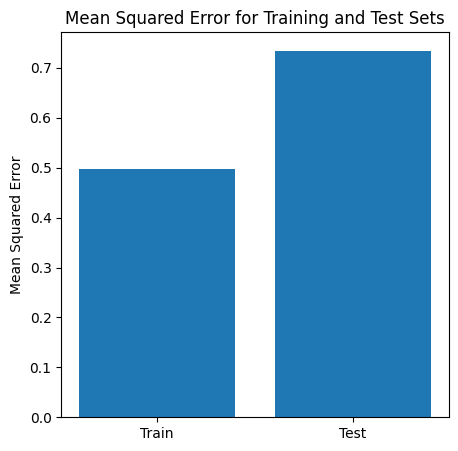

In [9]:
# Regular OLS
lr = LinearRegression(fit_intercept=False)

lr.fit(X_train, Y_train)

# Coefficients of the OLS
theta_hat = lr.coef_

Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)
MSE_train = mean_squared_error(Y_train, Y_pred_train)
MSE_test = mean_squared_error(Y_test, Y_pred_test)

models_summary['OLS'] = {'MSE_train': MSE_train, 'MSE_test': MSE_test}

# Plotting
plt.figure(figsize=(5, 5))
plt.bar(['Train', 'Test'], [MSE_train, MSE_test])
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Training and Test Sets')
plt.show()

### Variable selection

**3) Program the method of forward variable selection based on hypothesis tests for regression coefficients. This method starts from an empty set of variables S and at each iteration selects one variable relevant for predicting y and includes it in the set S. It runs until a halting condition is met. The coding process is as follows:**

**(a) Develop a function that, given a dataset $X \in \mathbb{R}^{n \times p}$ and $y$, fits $p$ linear regression models, each using only feature $X_j$ to predict $y$. For each model, conduct a test of no effect, as discussed in session 3, and compute the $p$-value of the test. This function should return the coefficient with the smallest $p$-value. Explain the significance of the $p$-value in this context.**

**Answer:**  The $p$-value in this context is used to determine the statistical significance of each feature in the linear regression model. Specifically, it is used to test the null hypothesis that the coefficient of a given feature in the model is zero, which would mean that the feature has no effect on the prediction of the target variable.

If the $p$-value is small (typically, less than 0.05), we reject the null hypothesis and conclude that the feature is statistically significant, i.e., it does have an effect on the prediction. If the $p$-value is large, we fail to reject the null hypothesis and conclude that we don't have enough evidence to say the feature is significant.

In [10]:
def smallest_p_value(X_train, Y_train, G_inv, df):

    #initial values
    smallest_p_value = {"index": -1, "p_value": 10}
    all_p_values = []
    
    for i in range(X_train.shape[1]):

        lr = LinearRegression(fit_intercept=False)

        lr.fit(X_train[:, i].reshape(-1, 1), Y_train)

        # standard deviation estimator
        residual = Y_train - lr.predict(X_train[:, i].reshape(-1, 1))
        # residual =  Y_train - X_train[:,i] * lr.coef_[0]
    
        variance = residual.T @ residual / df

        G_inv_ith = G_inv[i, i]

        # test statistics
        test_statistics = lr.coef_[0]/np.sqrt(variance*G_inv_ith)

        # p-value - T distribution
        
        p_value = 2*(1-t.cdf(np.abs(test_statistics), df))

        all_p_values.append(p_value)

        if p_value < smallest_p_value["p_value"]:
            smallest_p_value["index"] = i
            smallest_p_value["p_value"] = p_value

    # compute the prediction of the model with the smallest p-value

    lr.fit(X_train[:, smallest_p_value["index"]].reshape(-1, 1), Y_train)
    prediction = lr.predict(
        X_train[:, smallest_p_value["index"]].reshape(-1, 1))

    return smallest_p_value, prediction, all_p_values

**(b) Apply the function iteratively. At each iteration, select the feature $X_f$ with the smallest p-value and:**

i. Include it in the set $S$.

ii. Remove it from $X$.

iii. Subtract from $y$ the predictions of the model fit with feature $X_f$. Elaborate on the reason for subtracting the predictions.

**Answer:** The reason for subtracting the predictions from $y$ is to remove the effect of the selected feature from the target variable.

**(c) Add a halting condition to the algorithm: Stop adding features to the set $S$ when the p-value exceeds 0.05. Plot the p-values for every coefficient for the first 5 iterations (all in the same plot).**

In [11]:
S = []
condition = True
X_train_i = X_train
Y_train_i = Y_train
n_iter = 0
p_values = []
features = []
p_values_iterations = []
G_inv = np.linalg.pinv(X_train.T @ X_train)
df = Y_train.shape[0]

while (condition):

    index_p_value, prediction, all_p_values = smallest_p_value(
        X_train_i, Y_train_i, G_inv, df)

    p_values.append(index_p_value["p_value"])
    p_values_iterations.append(all_p_values)

    if (index_p_value["p_value"] > 0.05):
        condition = False

    # Include the variable with the smallest p-value in S
    S.append(X_train_i[:, index_p_value["index"]])
    features.append(index_p_value["index"])
    # Remove the variable with the smallest p-value from X
    X_train_i = np.delete(X_train_i, index_p_value["index"], axis=1)
    # Subtract the prediction from Y
    Y_train_i = Y_train_i - prediction

    n_iter += 1
    df -= 1

print("The selected features are: ", features)

The selected features are:  [13, 22, 16, 31, 54, 27, 73, 116, 73, 120, 125, 117, 196, 116, 112, 117, 152, 176, 88, 90, 184, 113, 148, 185, 149, 29, 110, 155, 8, 122, 82, 147, 87, 49]


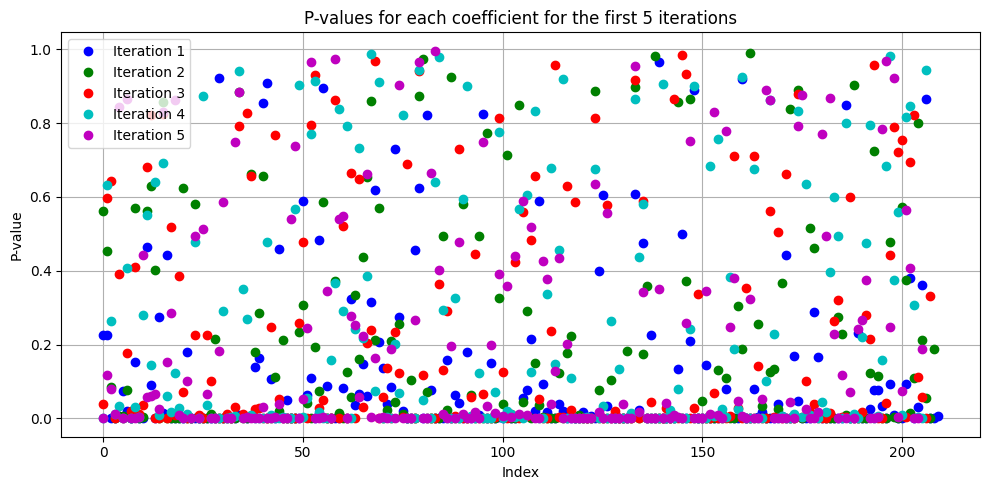

In [12]:
fig, axs = plt.subplots(figsize=(10, 5))
# Plot p-values for each coefficient for the first 5 iterations
colors = ['b', 'g', 'r', 'c', 'm']  # Define colors for the iterations
for i, p_values in enumerate(p_values_iterations[:5], start=1):
    axs.plot(p_values, 'o', label=f'Iteration {i}', color=colors[i-1])

axs.set_xlabel('Index')
axs.set_ylabel('P-value')
axs.set_title('P-values for each coefficient for the first 5 iterations')
axs.legend()
axs.grid(True)  

plt.tight_layout()
plt.show()

### Extensions

Ridge Regression


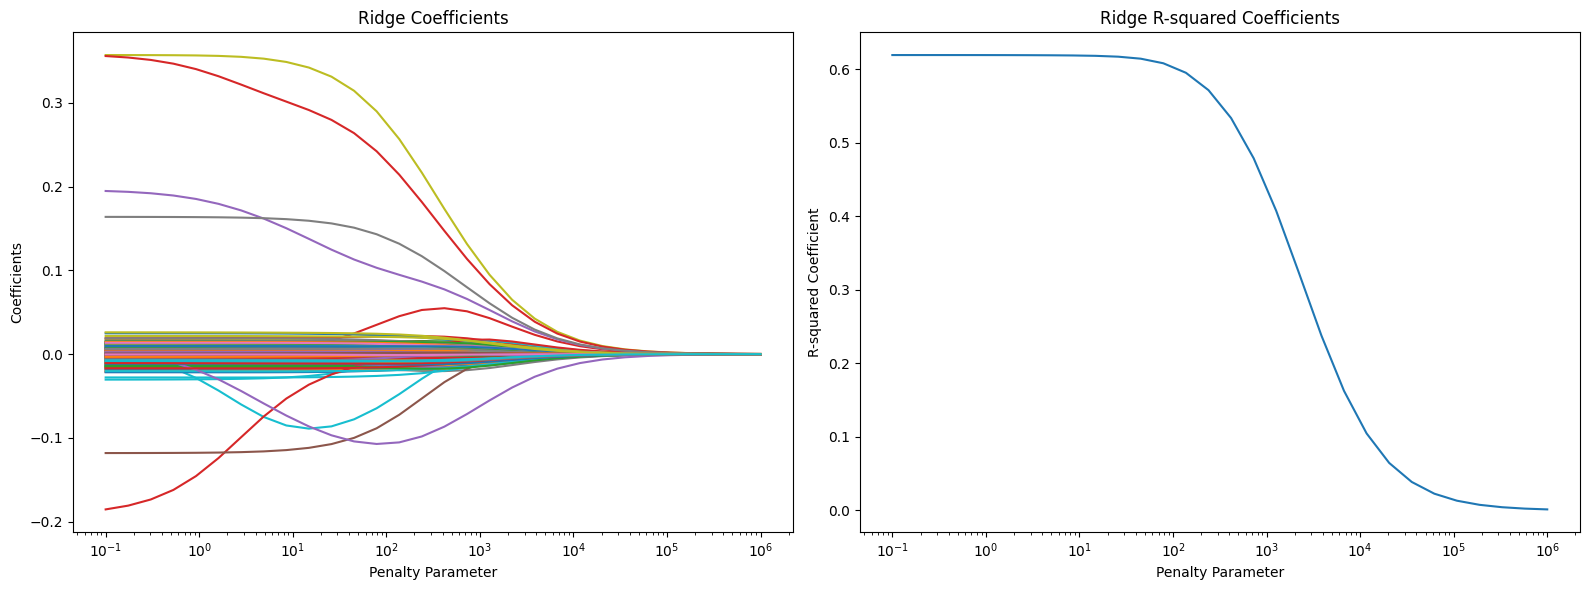

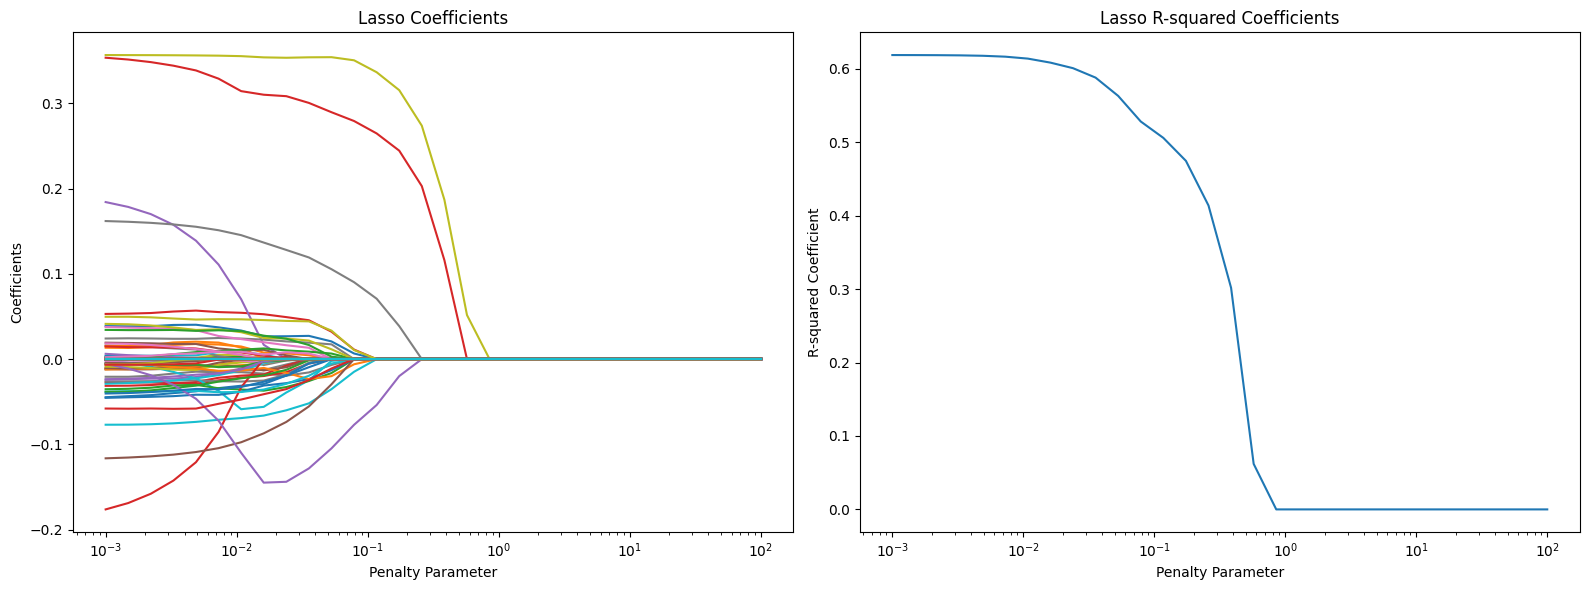

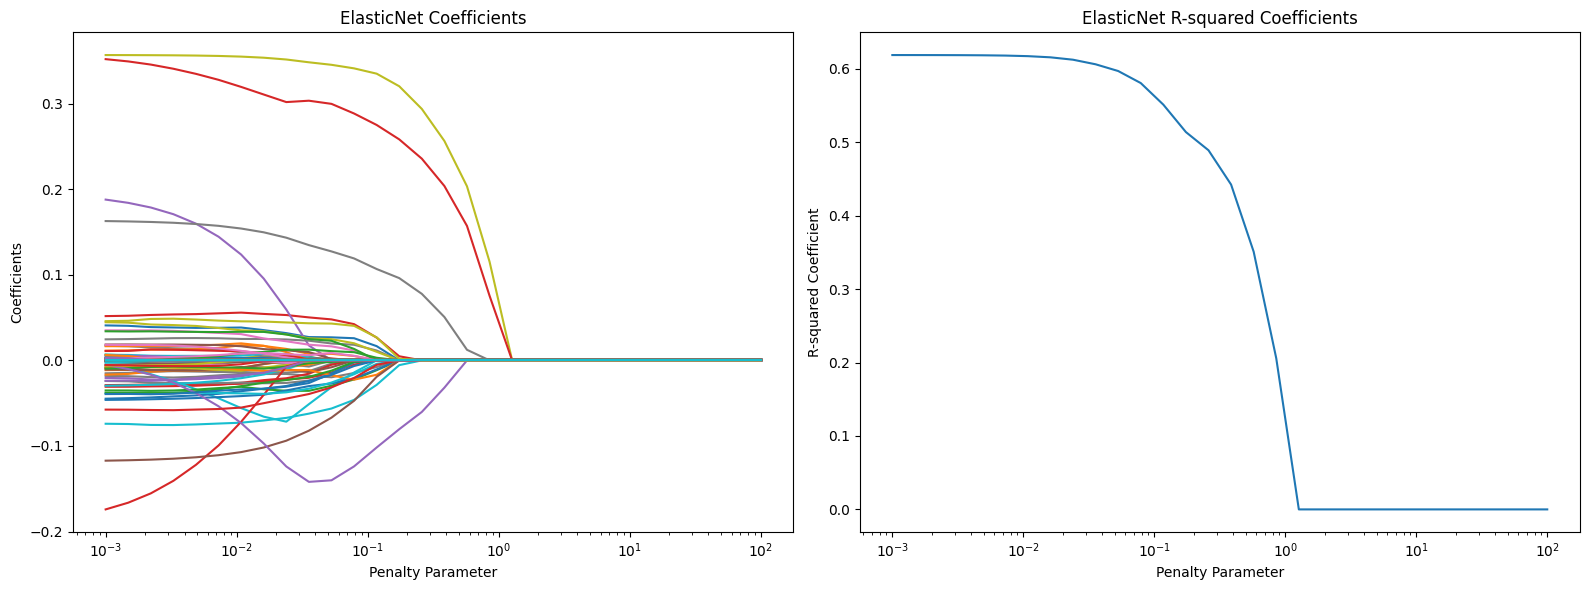

In [13]:
def run_regression(model, X_train, y_train, penalty_min, penalty_max, penalty_num=30):

    penalty_parameters = np.logspace(penalty_min, penalty_max, penalty_num)
    coefs = []
    r2_scores = []

    for a in penalty_parameters:
        if model == 'Ridge':
            reg = Ridge(alpha=a, max_iter=100000)
        elif model == 'Lasso':
            reg = Lasso(alpha=a, max_iter=100000)
        elif model == 'ElasticNet':
            reg = ElasticNet(alpha=a, max_iter=100000)
        else:
            print("Invalid model. Choose from 'Ridge', 'Lasso', 'ElasticNet'.")
            return

        reg.fit(X_train, y_train)
        coefs.append(reg.coef_)
        r2_scores.append(r2_score(y_train, reg.predict(X_train)))

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot 1: Coefficients
    axes[0].plot(penalty_parameters, coefs)
    axes[0].set_xscale('log')
    axes[0].set_xlabel('Penalty Parameter')
    axes[0].set_ylabel('Coefficients')
    axes[0].set_title(f'{model} Coefficients')

    # Subplot 2: R-squared scores
    axes[1].plot(penalty_parameters, r2_scores)
    axes[1].set_xscale('log')
    axes[1].set_xlabel('Penalty Parameter')
    axes[1].set_ylabel('R-squared Coefficient')
    axes[1].set_title(f'{model} R-squared Coefficients')

    fig.tight_layout()
    plt.show()


# Usage
title = 'Ridge Regression'
print(title)

run_regression('Ridge', X_train, Y_train, -1, 6, 30)

title = 'Lasso Regression'

print()

run_regression('Lasso', X_train, Y_train, -3, 2, 30)

title = 'ElasticNet Regression'

print()
run_regression('ElasticNet', X_train, Y_train, -3, 2, 30)

Lasso and ElasticNet display similar behaviors. While the ridge regression sees deacrease in coefficient values with larger penalty parameters, the Lasso and ElasticNet regressions reduce the coefficients to absolute zero at smaller penalty parameters. As to the $R^2$ coefficient, it goes to zero for smaller values of the penalty parameter for the Lasso and for the ElasticNet algorithms.

### PCR

**7) Compute the singular value decomposition of the covariance matrix. For consistency in the notation
use $U, s, V = SVD(X^{T}X)$**

In [14]:
# Take the intercept out
X_train = X_train[:, 1:]

# Take the average of the features
X_train_mean = np.mean(X_train, axis=0)

X_train = X_train - X_train_mean

# mean and variance of the features

cov_matrix = (X_train.T @ X_train)/(X_train.shape[0])

U, s, V = np.linalg.svd(cov_matrix, full_matrices=True)

**(a) Plot a heatmap of the covariance matrix.**

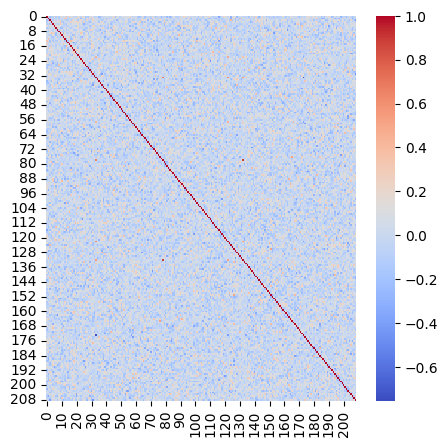

In [15]:
plt.figure(figsize=(5, 5))  # Increase figure size
# Use a different colormap and hide the colorbar
sns.heatmap(cov_matrix, cmap='coolwarm')
plt.show()

**(b) Compute the PCA for the data using the SVD.**

In [16]:
def compute_PCA(X, k):

    G = X.T @ X

    U, s, V = np.linalg.svd(G, full_matrices=True)

    # Get the first k columns of V
    V_k = V[:k, :]

    # Compute PCA matrix
    PCA = X @ V_k.T

    return PCA

**(c) Plot the amount of variance explained by the first $k$ components for $k$ in 2 ... $p$. How many variables do we need to explain more than 90% of the variance?**

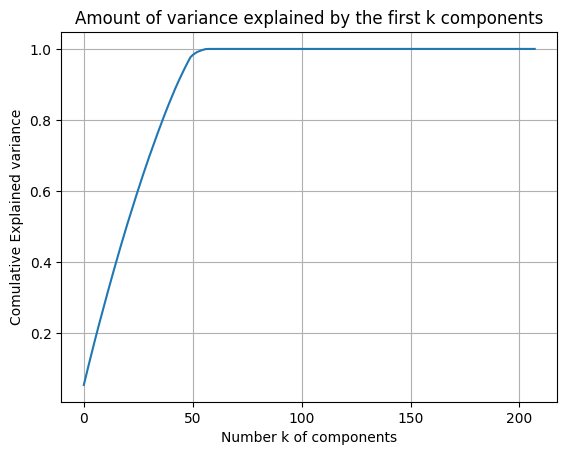

We need 45 components to explain more than 90% of the variance.


In [17]:
total_variance = np.sum(s)
normalized_s = s/total_variance
cumulative_s = np.cumsum(normalized_s)

plt.plot(cumulative_s[1:])
plt.xlabel('Number k of components')
plt.ylabel('Comulative Explained variance')
plt.title('Amount of variance explained by the first k components')
plt.grid(True)
plt.show()

# Find the number of components needed to explain more than 90% of the variance
num_components = np.where(cumulative_s > 0.9)[0][0] + 1
print(
    f"We need {num_components} components to explain more than 90% of the variance.")

**(d) Plot the projected data with $k = 2$ using as color the value of $y$ and interpret the plot.**

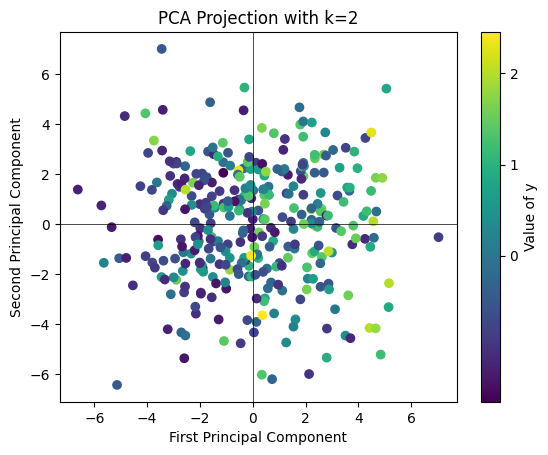

In [18]:
# Compute PCA with k=2
PCA_result = compute_PCA(X_train, 2)

# Add lines at x=0 and y=0
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.scatter(PCA_result[:, 0], PCA_result[:, 1], c=Y_train, cmap='viridis')
plt.colorbar(ticks=range(len(Y_train)), label='Value of y')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection with k=2')
plt.show()

In the scatter plot of the first two principal components, we observe that points with green to yellow colors (representing certain ranges of $y$ values) are mostly located on the left side of the plot, while light blue to blue points (representing other ranges of $y$ values) are predominantly on the right, with some exceptions. This suggests that the first principal component, which is the direction of maximum variance in the feature space, may also be capturing some of the variance related to the $y$ values. In other words, the $y$ values appear to be distributed in a way that aligns with the direction of maximum variance in the data, as captured by the first principal component.

**(e) Plot the the two first principal directions.**

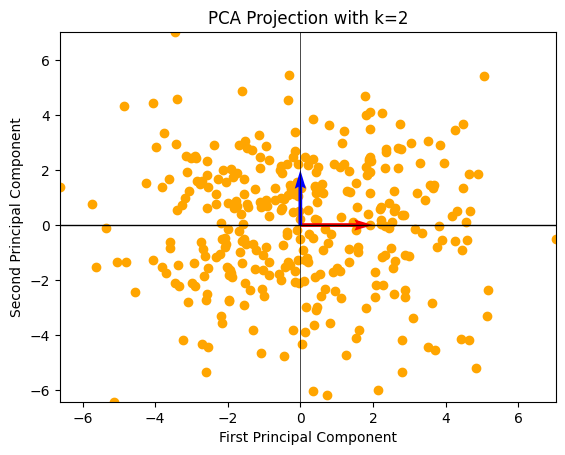

In [19]:
# Compute PCA with k=2
PCA_result = compute_PCA(X_train, 2)

# Calculate the mean of the PCA results
mean_x = np.mean(PCA_result[:, 0])
mean_y = np.mean(PCA_result[:, 1])

# Add lines at mean_x and mean_y
plt.axhline(mean_y, color='black', linewidth=1)
plt.axvline(mean_x, color='black', linewidth=0.5)

# Scatter plot
plt.scatter(PCA_result[:, 0], PCA_result[:, 1], c='orange')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection with k=2')

# Add vectors
plt.quiver(mean_x, mean_y, 2, 0, angles='xy',
           scale_units='xy', scale=1, color='r')  # x direction
plt.quiver(mean_x, mean_y, 0, 2, angles='xy',
           scale_units='xy', scale=1, color='b')  # y direction


# Set the limits of the plot
plt.xlim(min(PCA_result[:, 0]), max(PCA_result[:, 0]))
plt.ylim(min(PCA_result[:, 1]), max(PCA_result[:, 1]))

plt.show()

**(f) Run OLS on the projected data (PCR) using $k$ components for $k$ < 50. Select the k that
returns the best score of the OLS model and plot the evolution of the scores with $k$.**

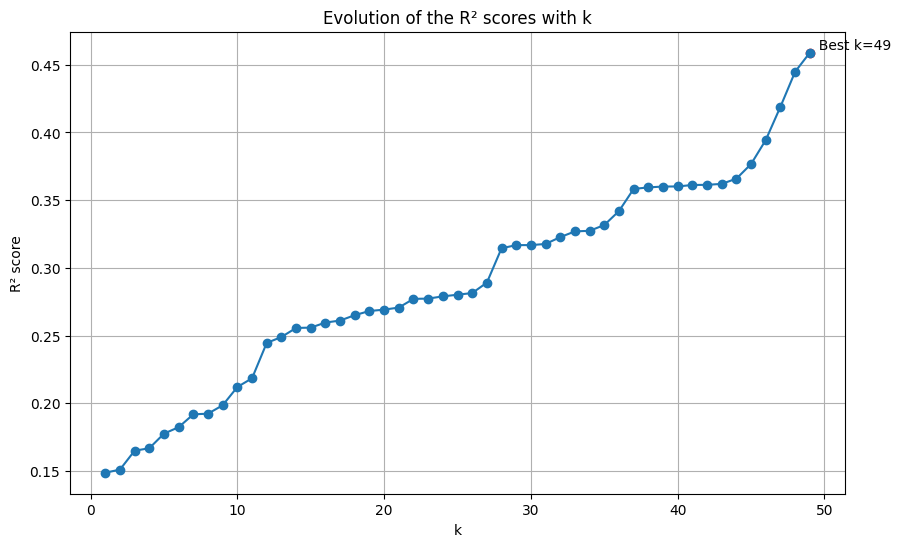

In [20]:
r2_scores = []
best_r2_score = 0
best_k = 0
for k in range(1, 50):
    PCA_result = compute_PCA(X_train, k)
    regression = LinearRegression(fit_intercept=False)
    regression.fit(PCA_result, Y_train)
    y_pred = regression.predict(PCA_result)
    score = r2_score(Y_train, y_pred)
    r2_scores.append(score)
    if score > best_r2_score:
        best_r2_score = score
        best_k = k


plt.figure(figsize=(10, 6))

# Plot the R² scores
plt.plot(range(1, 50), r2_scores, marker='o', linestyle='-')

# Highlight the best k
plt.scatter(best_k, best_r2_score, color='r')
plt.text(best_k, best_r2_score,
         f'  Best k={best_k}', verticalalignment='bottom')


plt.xlabel('k')
plt.ylabel('R² score')
plt.title('Evolution of the R² scores with k')
plt.grid(True)
plt.show()

### Comparison of the models

**8) Summarize the results of the models and elaborate in their main characteristics. Plot all the training and testing errors for all the models considered and elaborate on the results.**

In [21]:
X_train = X_train_init
X_test = X_test_init
Y_train = Y_train_init
Y_test = Y_test_init

In [22]:
# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a Ridge object
ridge = Ridge()

# Create the GridSearchCV object for Ridge
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5)

# Fit it to the data
grid_search_ridge.fit(X_train, Y_train)

# Print the parameters
print("Parameters for Ridge: ", grid_search_ridge.best_params_)

# Create a Lasso object
lasso = Lasso(max_iter=10000)

# Create the GridSearchCV object for Lasso
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5)

# Fit it to the data
grid_search_lasso.fit(X_train, Y_train)

# Print the parameters
print("Parameters for Lasso: ", grid_search_lasso.best_params_)

# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# Create an ElasticNet object
elastic_net = ElasticNet(max_iter=10000)

# Create the GridSearchCV object for ElasticNet
grid_search_elastic_net = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the data
grid_search_elastic_net.fit(X_train, Y_train)

# Print the best parameters
print("Parameters for ElasticNet: ", grid_search_elastic_net.best_params_)

Parameters for Ridge:  {'alpha': 100}
Parameters for Lasso:  {'alpha': 0.1}
Parameters for ElasticNet:  {'alpha': 0.1, 'l1_ratio': 0.7}


In [23]:
# Get the parameters
alpha_ridge = grid_search_ridge.best_params_['alpha']
alpha_lasso = grid_search_lasso.best_params_['alpha']
elasticNet_params = grid_search_elastic_net.best_params_

# Initialize the models
ridge = Ridge(alpha=alpha_ridge)
lasso = Lasso(alpha=alpha_lasso)
elastic_net = ElasticNet(alpha=elasticNet_params['alpha'], l1_ratio=elasticNet_params['l1_ratio'])
forward_selection = LinearRegression()

# List of (name, model) tuples
models = [('Ridge', ridge), ('Lasso', lasso), ('ElasticNet', elastic_net), ('ForwardSelection', forward_selection)]

for name, model in models:
    # Fit the model to the training data
    if name == 'ForwardSelection':
        model.fit(X_train[:, features], Y_train)
    else:
        model.fit(X_train, Y_train)

    # Predict the training and test set
    if name == 'ForwardSelection':
        Y_train_pred = model.predict(X_train[:, features])
        Y_test_pred = model.predict(X_test[:, features])
    else:
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)

    # Calculate the MSE for the training and test set
    MSE_train = mean_squared_error(Y_train, Y_train_pred)
    MSE_test = mean_squared_error(Y_test, Y_test_pred)

    # Store the MSE in the model_summary dictionary
    models_summary[name] = {'MSE_train': MSE_train, 'MSE_test': MSE_test}

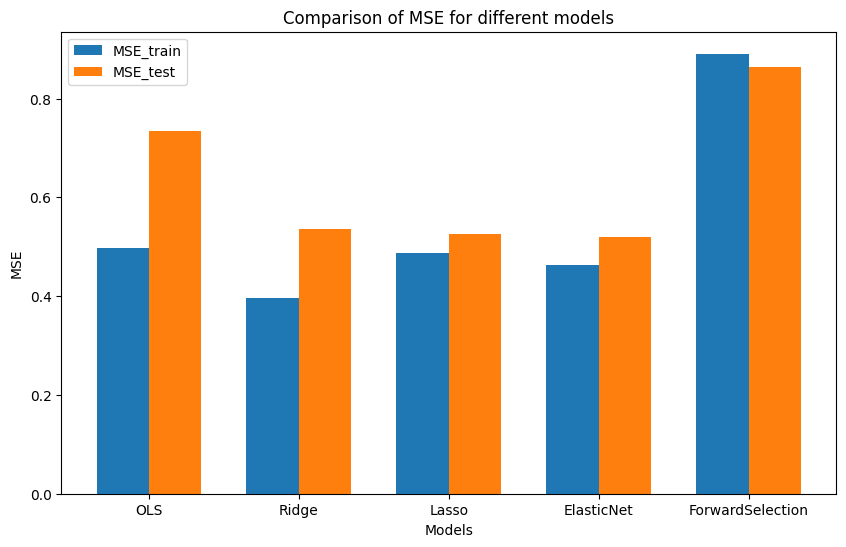

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get the model names
models = list(models_summary.keys())

# Get the MSE_train and MSE_test for each model
MSE_train = [models_summary[model]['MSE_train'] for model in models]
MSE_test = [models_summary[model]['MSE_test'] for model in models]

# Create an index for each model
index = np.arange(len(models))

# Set the width of the bars
bar_width = 0.35

# Create a new figure
plt.figure(figsize=(10, 6))

# Create the bars for the training MSE
plt.bar(index, MSE_train, bar_width, label='MSE_train')

# Create the bars for the test MSE
plt.bar(index + bar_width, MSE_test, bar_width, label='MSE_test')

# Add labels and a title
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE for different models')

# Add the model names as x-axis labels
plt.xticks(index + bar_width / 2, models)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Based on the results of the comparison, it's observed that all models performed better on the training sets than on the testing sets (except foward selection). This is a common phenomenon in machine learning and is due to the models being trained on the training data. They are optimized to minimize the error on this data, and hence, they perform better on it. The Ridge model performed slightly better on the training sets compared to the other models. 

For the testing sets, the Ordinary Least Squares (OLS) model performed significantly worse than the other models (except forward selection). This could be due to overfitting, where the OLS model may have fit the training data too closely, capturing the noise along with the underlying pattern. This makes it perform poorly on unseen data. The other models, Ridge, Lasso, and ElasticNet, use regularization to prevent overfitting, which could explain their similar and better performance on the testing sets.